In [1]:
# Import libraries

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

# List all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tips-dataset/tips.csv


In [2]:
# Load the dataset

df = pd.read_csv('/kaggle/input/tips-dataset/tips.csv')

# Display the first few rows of the dataset

print(df.head())

   total_bill   tip     sex smoker  day    time  size  price_per_person  \
0       16.99  1.01  Female     No  Sun  Dinner     2              8.49   
1       10.34  1.66    Male     No  Sun  Dinner     3              3.45   
2       21.01  3.50    Male     No  Sun  Dinner     3              7.00   
3       23.68  3.31    Male     No  Sun  Dinner     2             11.84   
4       24.59  3.61  Female     No  Sun  Dinner     4              6.15   

           Payer Name         CC Number Payment ID  
0  Christy Cunningham  3560325168603410    Sun2959  
1      Douglas Tucker  4478071379779230    Sun4608  
2      Travis Walters  6011812112971322    Sun4458  
3    Nathaniel Harris  4676137647685994    Sun5260  
4        Tonya Carter  4832732618637221    Sun2251  


In [3]:
# Concise summary of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        244 non-null    float64
 1   tip               244 non-null    float64
 2   sex               244 non-null    object 
 3   smoker            244 non-null    object 
 4   day               244 non-null    object 
 5   time              244 non-null    object 
 6   size              244 non-null    int64  
 7   price_per_person  244 non-null    float64
 8   Payer Name        244 non-null    object 
 9   CC Number         244 non-null    int64  
 10  Payment ID        244 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 21.1+ KB


There are no missing values in the dataset.

## BAR PLOT 

**Bar charts** are commonly used in data analysis to compare data across different categories. They are one of the most common types of charts used in data visualization. Bar charts are useful for displaying categorical data and can be used to represent a wide range of data types, including nominal, ordinal, interval, and ratio data. 

Bar charts can be used to do the following:
- Compare counts by categories.
- Display a variable function (sum, average, standard deviation) by categories.
- Understand relationships between categorical variables.

Bar charts can be of different types, such as vertical bar graphs, horizontal bar graphs, grouped bar graphs, and stacked bar graphs.

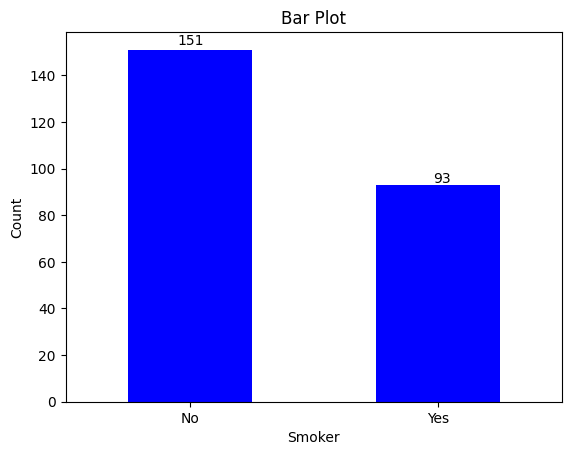

In [5]:
# bar plot to compare count by categorical variable 'smoker' 
df['smoker'].value_counts().plot(kind='bar', rot = 0, color = 'blue')

# add bar label
plt.text(x = 0.98, y = df.smoker.value_counts()[1]+1, s = df.smoker.value_counts()[1])
plt.text(x = -0.05, y = df.smoker.value_counts()[0]+2, s = df.smoker.value_counts()[0])

# add title and axes label
plt.title('Bar Plot')
plt.xlabel('Smoker')
plt.ylabel('Count')

# display the plot
plt.show()

## PIE PLOT 

**Pie charts** are used to represent data as a proportion of a whole. They are circular statistical plots that can display only one series of data. The area of the chart is the total percentage of the given data. The area of slices of the pie represents the percentage of the parts of the data. The slices of pie are called wedges. Pie charts are commonly used in business presentations like sales, operations, survey results, resources, etc as they provide a quick summary. 

Pie charts can be used to do the following:
- Compare the sizes of categories to the entire dataset.
- Show the proportion of each category in the dataset.

Pie charts are useful when you want to show the relative sizes of different categories in a dataset. They are particularly useful when the data is categorical and the categories are mutually exclusive.

In [6]:
# let's represent categorical variable 'day' in a pie plot
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

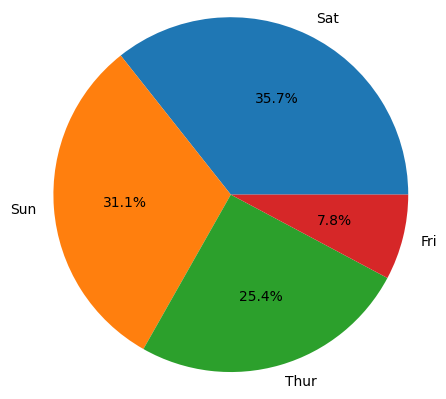

In [7]:
plt.pie(df['day'].value_counts(), autopct='%.1f%%', radius=1.2, labels=['Sat', 'Sun', 'Thur', 'Fri'])
plt.show()

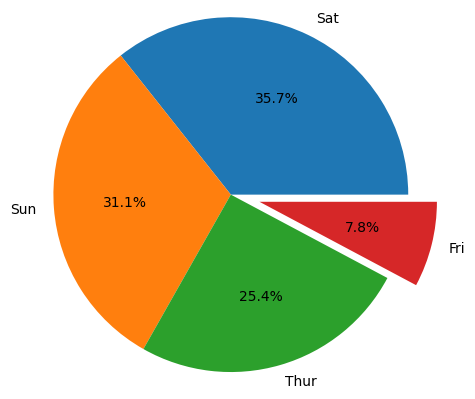

In [8]:
# extended pie plot
plt.pie(df['day'].value_counts(), autopct='%.1f%%', radius=1.2, labels=['Sat', 'Sun', 'Thur', 'Fri'], explode=[0,0,0,0.2])
plt.show()

**Donut Pie Plot** is a type of pie plot in which there is a hollow center representing a doughnut.

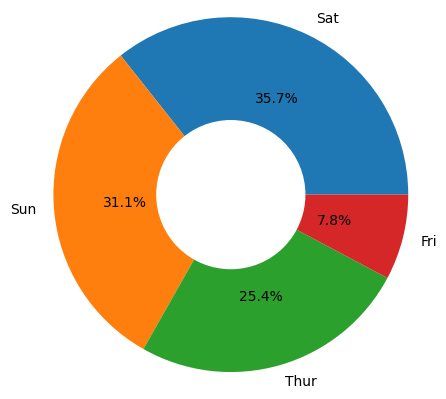

In [9]:
# pie plot
plt.pie(df['day'].value_counts(), autopct='%.1f%%', radius=1.2, labels=['Sat', 'Sun', 'Thur', 'Fri'])

# add a circle at the center
circle = plt.Circle((0,0), 0.5, color='white')
plot = plt.gcf()
plot.gca().add_artist(circle)

# display the plot
plt.show()

## HISTOGRAM PLOT

A **histogram** is a graphical representation of data values grouped into different classes. It is a variation of a bar chart that enables you to see how frequently data in each class occur in the dataset. The histogram graphically shows the following:
- Frequency of different data points in the dataset.
- Location of the center of data.
- The spread of dataset.
- Skewness/variance of dataset.
- Presence of outliers in the dataset.

Histograms are commonly used in data analysis to visualize the distribution of a dataset, including information about its central tendency, spread, and skewness. They are particularly useful for identifying patterns and outliers in large datasets.

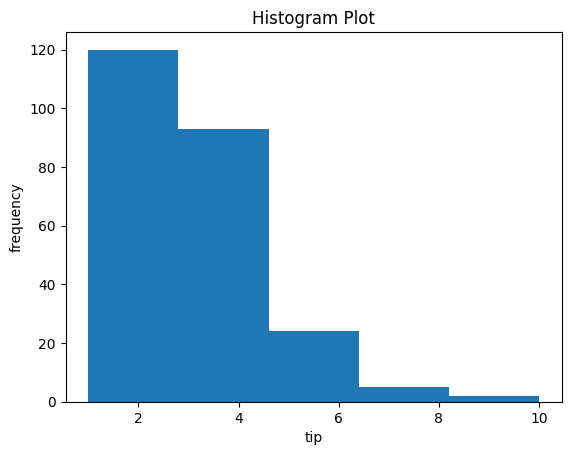

In [10]:
# plot histogram using variable 'tip' which is a continuous variable
plt.hist(df['tip'], bins=5)
plt.title("Histogram Plot")
plt.xlabel("tip")
plt.ylabel("frequency")
plt.show()

From the above plot, we can see that the tip amount is positively skewed.

## BOX PLOT

A **box plot**, also known as a box and whisker plot, is a type of chart that is often used in **descriptive statistics** to visualize the distribution of numerical data and skewness by displaying the data quartiles (or percentiles) and averages. Box plots are useful for identifying outliers and their values, if the data is symmetrical, how tightly the data is grouped, and if and how the data is skewed. 

A box plot shows the five-number summary of a set of data, including the minimum score, first (lower) quartile, median, third (upper) quartile, and maximum score. The box plot divides the data into sections containing approximately 25% of the data in that set. The box plot shows the middle 50% of scores (i.e., the range between the 25th and 75th percentile). The upper and lower whiskers represent scores outside the middle 50% (i.e., the lower 25% of scores and the upper 25% of scores). 

Box plots are useful as they provide a visual summary of the data enabling researchers to quickly identify mean values, the dispersion of the data set, and signs of skewness.

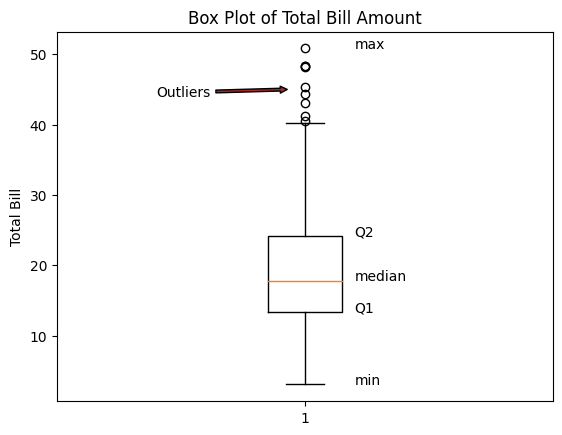

In [11]:
# box plot using variable 'total_bill'

# box plot
plt.boxplot(df['total_bill'])

# add text
plt.text(x=1.1, y=df['total_bill'].min(), s='min')
plt.text(x=1.1, y=df['total_bill'].max(), s='max')
plt.text(x=1.1, y=df['total_bill'].quantile(0.25), s='Q1')
plt.text(x=1.1, y=df['total_bill'].quantile(0.75), s='Q2')
plt.text(x=1.1, y=df['total_bill'].median(), s='median')

# add an arrow to show the outliers
plt.annotate('Outliers', xy=(0.97,45), xytext=(0.7,44), arrowprops = dict(facecolor='brown', arrowstyle = 'simple'))

# add labels and titles
plt.ylabel('Total Bill')
plt.title('Box Plot of Total Bill Amount')

# display the plot
plt.show()

## VIOLIN PLOT

A **violin plot** is a type of chart that is used to visualize the distribution of a dataset. It is similar to a box plot, but with a rotated plot on each side, giving more information about the density estimate on the y-axis. The violin plot displays the distribution of data by showing the probability density of the data at different values, with the width of the plot indicating the density of data points at different values. The violin plot is useful for identifying the shape of the distribution, including its skewness and multimodality. 

The violin plot consists of four components ¹:
- A white centered dot at the middle of the graph: The white dot point at the middle is the median of the distribution.
- A thin gray bar inside the plot: The bar in the plot represents the quartile range of the distribution.
- A long thin line coming outside from the bar: The thin line represents the rest of the distribution, which is calculated by the formula Q1-1.5 IQR for the lower range and Q3+1.5 IQR for the upper range. The point lying beyond this line is considered as outliers.
- A line boundary separating the plot: A KDE plot is used for defining the boundary of the violin plot. It represents the distribution of data points.

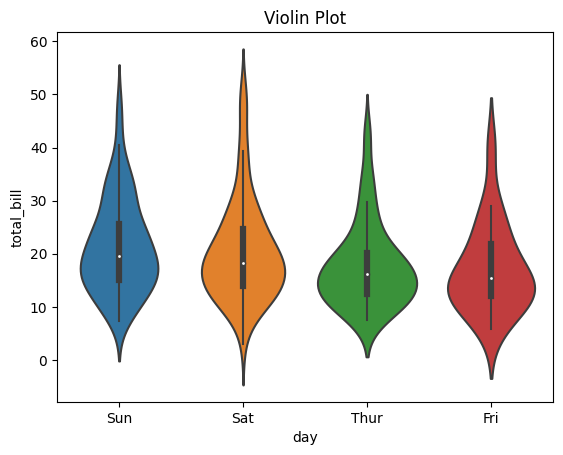

In [14]:
# Create a violin plot between categorical variable 'day' and the numeric variable 'total_bill'
sns.violinplot(x="day", y="total_bill", data=df)

# add title
plt.title('Violin Plot')

# Show the plot
plt.show()

**'displot'** is a function in the **`seaborn`** library that provides access to several approaches for visualizing the univariate or bivariate distribution of data, including subsets of data defined by semantic mapping and faceting across multiple subplots. It is an essential tool for exploratory data analysis as it assists in identifying outliers and skewness or providing a summary of the measures of central tendency (mean, median, and mode). 

The **`displot`** function can be used to draw a histogram, kernel density estimate (KDE), or empirical cumulative distribution function (ECDF) plot. Additionally, a rug plot can be added to any kind of plot to show individual observations.

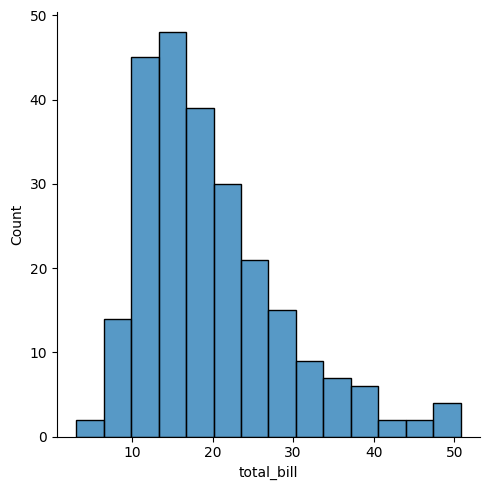

In [16]:
# plot a distribution plot showing histogram
sns.displot(df['total_bill'])
plt.show()

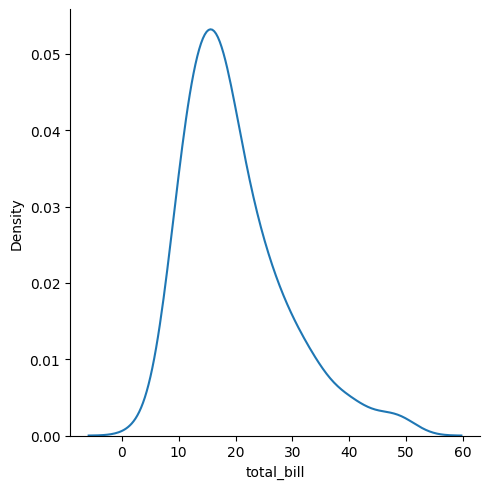

In [17]:
# plot a distribution plot showing kernel density estimate
sns.displot(df['total_bill'], kind='kde')
plt.show()

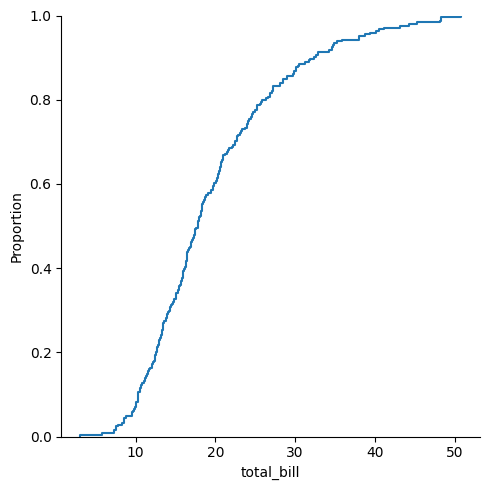

In [18]:
# empirical cumulative distribution functions
sns.displot(df['total_bill'], kind='ecdf')
plt.show()

## CORRELATION MATRIX AND HEAT MAP

**Correlation matrix and heat map** are two important tools in data analysis. A correlation matrix is a table that shows the correlation coefficients between different variables in a dataset. It is useful for identifying patterns and relationships between variables. A heat map is a graphical representation of data that uses color to represent the magnitude of values in a two-dimensional matrix.

<Axes: >

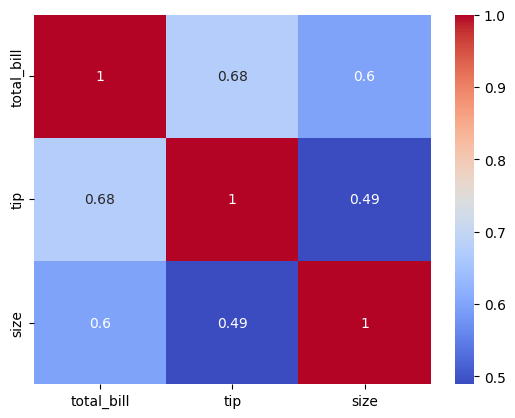

In [20]:
# Select only numeric columns
numeric_df = df.loc[:, ['total_bill', 'tip', 'size']]

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Create heat map
sns.heatmap(corr_matrix, cmap='coolwarm',annot=True )